In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"F:\Project_3\indian_liver_patient - indian_liver_patient.csv")

# Inspect the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Basic statistics
print(df.describe())

   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1 

Outlier of Dataset:

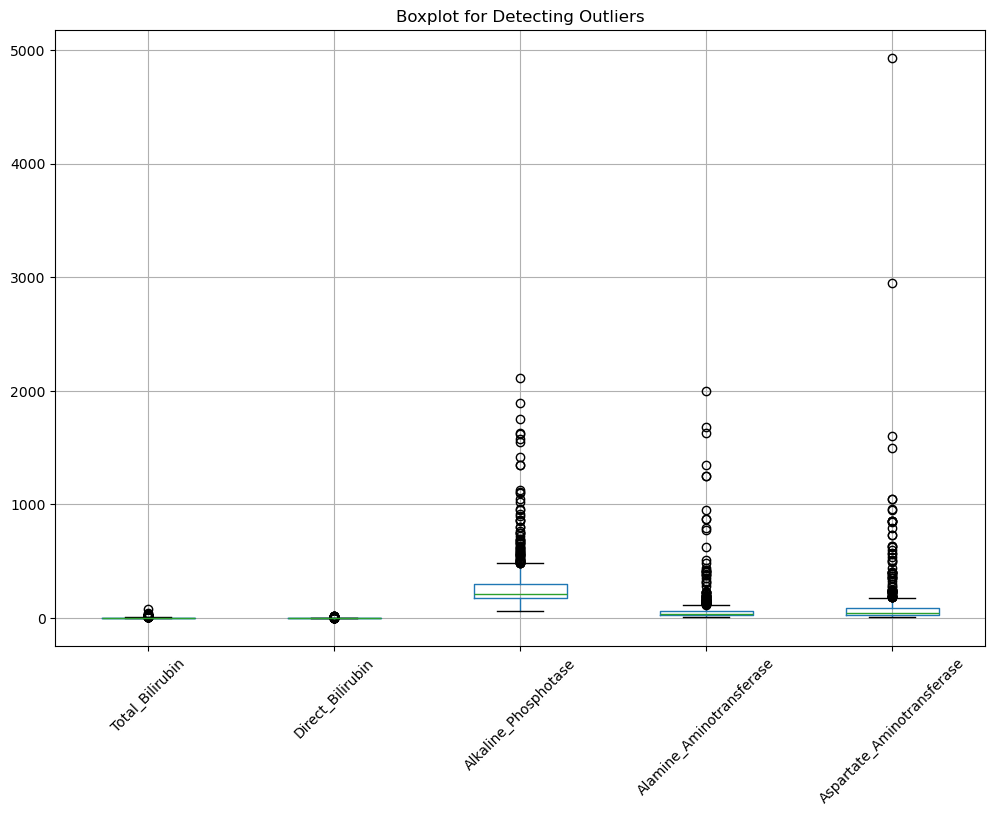

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for numerical columns
plt.figure(figsize=(12, 8))
df.boxplot(column=['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 
                   'Alamine_Aminotransferase', 'Aspartate_Aminotransferase'])
plt.xticks(rotation=45)
plt.title("Boxplot for Detecting Outliers")
plt.show()


In [88]:
import numpy as np

def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    
    return df

# Apply to each column with outliers
df = handle_outliers_iqr(df, 'Total_Bilirubin')
df = handle_outliers_iqr(df, 'Direct_Bilirubin')
df = handle_outliers_iqr(df, 'Alkaline_Phosphotase')
df = handle_outliers_iqr(df, 'Alamine_Aminotransferase')
df = handle_outliers_iqr(df, 'Aspartate_Aminotransferase')

In [90]:
def detect_outliers_iqr(df, columns):
    outliers = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return outliers

# Specify columns for outlier detection
columns_to_check = ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 
                    'Alamine_Aminotransferase', 'Aspartate_Aminotransferase']

# Detect outliers
outliers_iqr = detect_outliers_iqr(df, columns_to_check)
for col, outliers in outliers_iqr.items():
    print(f"Outliers in column {col}: {outliers.shape[0]} instances")


Outliers in column Total_Bilirubin: 0 instances
Outliers in column Direct_Bilirubin: 0 instances
Outliers in column Alkaline_Phosphotase: 0 instances
Outliers in column Alamine_Aminotransferase: 0 instances
Outliers in column Aspartate_Aminotransferase: 0 instances


Encoding:

In [64]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [65]:
print(df['Dataset'].value_counts(normalize=True))

# Apply SMOTE
from imblearn.over_sampling import SMOTE

X = df.drop(columns=['Dataset'])
y = df['Dataset']

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

Dataset
1    0.713551
2    0.286449
Name: proportion, dtype: float64


C:\Users\mzraj\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

📌 Random Forest Performance:
              precision    recall  f1-score   support

           1       0.77      0.84      0.80        75
           2       0.86      0.79      0.82        92

    accuracy                           0.81       167
   macro avg       0.81      0.82      0.81       167
weighted avg       0.82      0.81      0.81       167

Accuracy: 0.81


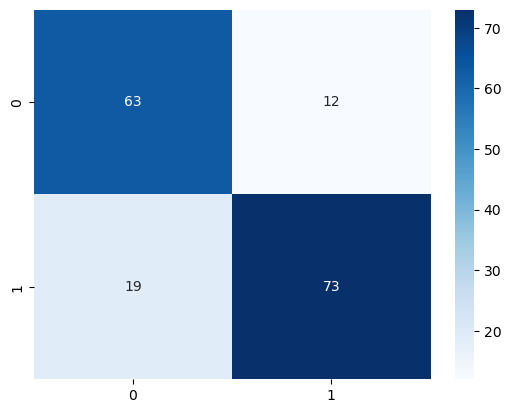

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Evaluate
y_pred = rf.predict(X_test_scaled)

# Print classification report
print("📌 Random Forest Performance:")
print(classification_report(y_test, y_pred))

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()


In [69]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
   

}

# Dictionary to store accuracy scores
accuracy_scores = {}
best_model = None

# Loop through models, train them, and calculate accuracy
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Train model
    y_pred = model.predict(X_test_scaled)  # Predict
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    accuracy_scores[model_name] = accuracy  # Store accuracy

# Print the accuracy of each model
for model_name, accuracy in accuracy_scores.items():
    print(f"{model_name} Accuracy: {accuracy:.2f}")

# Find the best model based on accuracy
best_model_name = max(accuracy_scores, key=accuracy_scores.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} with Accuracy: {accuracy_scores[best_model_name]:.2f}")




Logistic Regression Accuracy: 0.74
Random Forest Accuracy: 0.81
SVM Accuracy: 0.74
KNN Accuracy: 0.70
Gradient Boosting Accuracy: 0.79

Best Model: Random Forest with Accuracy: 0.81


In [70]:
import pickle


# Save the best model (Random Forest) to a pickle file
pickle_file = r"F:\Project_3\Random_Forest_model.pkl"  # File path to save the model
with open(pickle_file, 'wb') as f:
    pickle.dump(best_model, f)

print(f"Best model saved to {pickle_file}")

# Load the best model from the pickle file
with open(r"F:\Project_3\Random_Forest_model.pkl", 'rb') as f:
    best_model = pickle.load(f)

# Use the loaded model for predictions
y_pred_loaded = best_model.predict(X_test_scaled)

# Calculate accuracy of the loaded model
from sklearn.metrics import accuracy_score
print(f"Accuracy of the loaded model: {accuracy_score(y_test, y_pred_loaded):.2f}")


Best model saved to F:\Project_3\Random_Forest_model.pkl
Accuracy of the loaded model: 0.81
